In [20]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

In [21]:
df = pd.read_csv("data/clean_TAIPEI_diabetes.csv")

#### Check data structure

In [22]:
print(df.head())

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1424119            1             85                      59   
1    1619297            0             82                      92   
2    1660149            0            133                      47   
3    1458769            0             67                      87   
4    1201647            8             80                      95   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                27            35  42.604536          0.549542   22         0  
1                 9           253  19.724160          0.103424   26         0  
2                19           227  21.941357          0.174160   21         0  
3                43            36  18.277723          0.236165   26         0  
4                33            24  26.624929          0.443947   53         1  


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10471 non-null  int64  
 1   Pregnancies             10471 non-null  int64  
 2   PlasmaGlucose           10471 non-null  int64  
 3   DiastolicBloodPressure  10471 non-null  int64  
 4   TricepsThickness        10471 non-null  int64  
 5   SerumInsulin            10471 non-null  int64  
 6   BMI                     10471 non-null  float64
 7   DiabetesPedigree        10471 non-null  float64
 8   Age                     10471 non-null  int64  
 9   Diabetic                10471 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 818.2 KB
None


In [24]:
print(df.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.047100e+04  10471.000000   10471.000000            10471.000000   
mean   1.504674e+06      2.127781     105.799351               71.108968   
std    2.880059e+05      2.789957      30.883445               16.425644   
min    1.000069e+06      0.000000      44.000000               31.000000   
25%    1.256644e+06      0.000000      83.000000               57.000000   
50%    1.507697e+06      1.000000     103.000000               72.000000   
75%    1.754544e+06      3.000000     127.000000               85.000000   
max    1.999997e+06     14.000000     174.000000              112.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      10471.000000  10471.000000  10471.000000      10471.000000   
mean          28.405119    108.896953     31.272642          0.332687   
std           14.163763     86.627196      9.882741          0.270481   
min            7.000000

#### Check missing values

In [25]:
print(df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [26]:
# Split into X (features) and y (target variable)
X = df.drop(columns=["PatientID", "Diabetic"])
y = df["Diabetic"]

In [27]:
# Split into train and test (80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
joblib.dump(scaler, "../storage/models/scaler.pkl")

['../storage/models/scaler.pkl']

In [30]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)            # Binary predictions
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability of being diabetic (for ROC AUC)

In [31]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 96.13 %


In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1505   32]
 [  49  509]]


In [33]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1537
           1       0.94      0.91      0.93       558

    accuracy                           0.96      2095
   macro avg       0.95      0.95      0.95      2095
weighted avg       0.96      0.96      0.96      2095



In [34]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(roc_auc, 4))

ROC AUC Score: 0.993


In [35]:
## the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

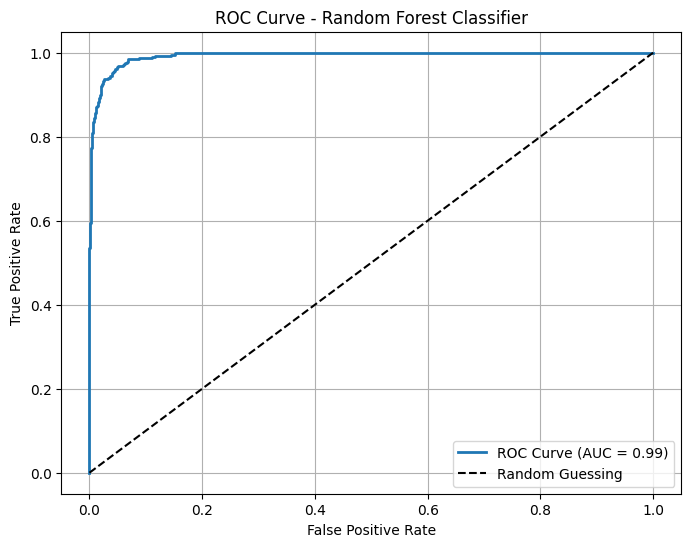

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("F1 Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9613365155131265
Confusion Matrix:
 [[1505   32]
 [  49  509]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1537
           1       0.94      0.91      0.93       558

    accuracy                           0.96      2095
   macro avg       0.95      0.95      0.95      2095
weighted avg       0.96      0.96      0.96      2095

ROC AUC Score: 0.993005272571667
F1 Score: 0.993005272571667


In [38]:
joblib.dump(xgb_model, "../storage/models/xgb_model.pkl")

['../storage/models/xgb_model.pkl']